In [4]:
from ocr.core import *
import cv2
from fastai import *
from fastai.vision import *

### Corner detection

In [5]:
from ocr.corner_detection_training import *
from ocr.corner_detection_inference import PaperCornerPredictor, show_points_on_mask

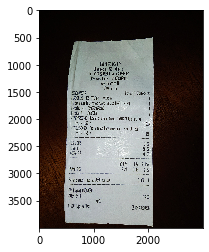

In [10]:
im = cv2.imread('../test_data/cekis.jpg')
im = im[ :, :, [2,1,0] ] # BGR -> RGB
plot(im)

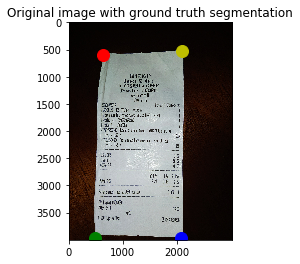

In [11]:
corner_predictor = PaperCornerPredictor(use_unet=False, use_gpu=False)
pts = corner_predictor.predict_corners(tensor(im), shape='train')
show_points_on_mask(im, pts)

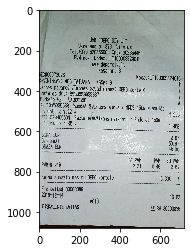

In [12]:
transformed_im = corner_predictor.transform_image(im, pts)
plot(transformed_im)

### Text bounding box

In [13]:
from ocr.bbox_east_training import *
from ocr.bbox_east_inference import TextBBoxPredictor, show_bboxes_on_image

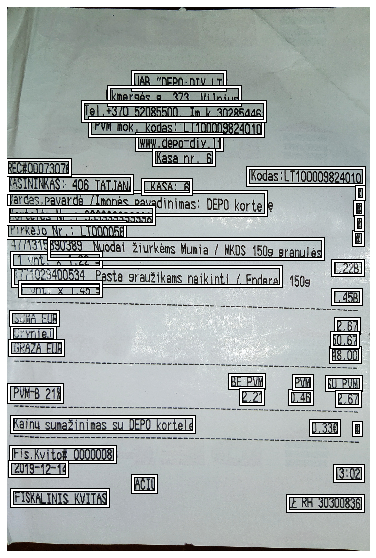

In [14]:
t = TextBBoxPredictor(model_name='east_bbox_10x3', use_gpu=False)
bboxes = t.image2bboxes(tensor(transformed_im))
show_bboxes_on_image(transformed_im, bboxes)

### Dewarp

In [15]:
from ocr.dewarp import dewarp_image

In [89]:
%matplotlib inline

In [90]:
img = cv2.imread('../test_data/warped_page.jpg')
thresh = dewarp_image(img)

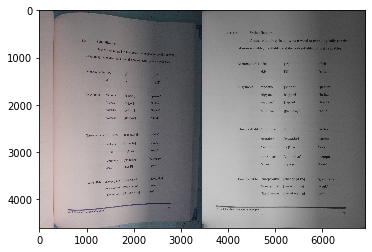

In [91]:
plot(np.concatenate([img, thresh], axis=1))

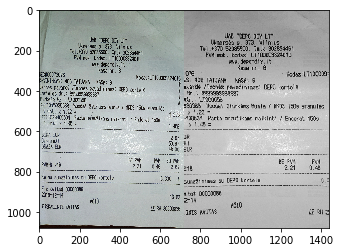

In [92]:
thresh = dewarp_image(transformed_im)
plot(np.concatenate([transformed_im, thresh], axis=1))

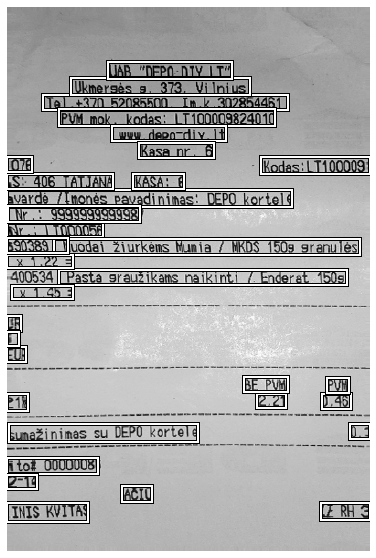

In [21]:
thresh_bboxes = t.image2bboxes(tensor(thresh))
show_bboxes_on_image(thresh, thresh_bboxes)

### OCR

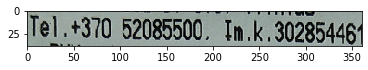

In [84]:
im, bb = transformed_im, bboxes
bb = bb[6:]
# im, bb = thresh, thresh_bboxes
for t,l,b,r in bb:
    text_im = im[ t:b , l:r ]
    plot(text_im)
    break

In [85]:
from ocr.ocr_crnn_training import *
from ocr.ocr_attention_training import *
from ocr.ocr_inference import CrnnOcrPredictor, TesseractOcrPredictor, AttentionOcrPredictor

In [86]:
c = CrnnOcrPredictor(model_name='crnn_ocr', use_gpu=False)
text = c.image2text(tensor(text_im))
print(text)

TEL.+370 52085500, IM.K.30285446


In [87]:
c = AttentionOcrPredictor(model_name='attention_ocr', use_gpu=False)
text = c.image2text(tensor(text_im))
print(text)

TEL. +370 52085500, 1M K30285446


In [88]:
c = TesseractOcrPredictor()
text = c.image2text(tensor(text_im))
print(text)

Tel +370 52085500, Tm.k 302854464
